# **Bioinformatics Project: Computational Drug Dsicovery [Part 5]: Comparing Regressors**

Hamza Ahmed

---

### **Import Libraries**

In [ ]:
! pip install lazypredict

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

Note: In order to load LazyRegressor and overcome a type error I had to change the the following line of code : ("encoding", OneHotEncoder(handle_unknown="ignore", sparse=False)) to ("encoding", OneHotEncoder(handle_unknown="ignore", sparse_output=False))

In [17]:
# Read the data set: 

df = pd.read_csv('data_Part3/acetylcholinesterase_04_bioactivity_data_3class_pIC50_fp.csv')

In [21]:
# X featuers = Fingerprints: 
X = df.drop(['pIC50'], axis=1)
X.shape

(4695, 881)

In [29]:
Y = df.pIC50
Y.shape

(4695,)

In [27]:
# Remove Low variance featuers: 
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold((0.8 * (1-0.8)))
# transform the data:
X = selection.fit_transform(X)
X.shape


(4695, 137)

In [30]:
# Data Split: 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **Compare ML algorithms**

In [31]:

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
model_train, prediction_train = reg.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 42/42 [01:27<00:00,  2.09s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


In [32]:
model_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.80,0.80,0.69,0.09
ExtraTreeRegressor,0.80,0.80,0.69,0.12
ExtraTreesRegressor,0.80,0.80,0.69,3.78
GaussianProcessRegressor,0.80,0.80,0.69,4.09
RandomForestRegressor,0.74,0.75,0.77,2.55
XGBRegressor,0.74,0.75,0.78,0.42
BaggingRegressor,0.72,0.73,0.80,0.29
MLPRegressor,0.63,0.65,0.92,46.71
HistGradientBoostingRegressor,0.55,0.56,1.03,0.99


In [33]:
prediction_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.80,0.80,0.69,0.09
ExtraTreeRegressor,0.80,0.80,0.69,0.12
ExtraTreesRegressor,0.80,0.80,0.69,3.78
GaussianProcessRegressor,0.80,0.80,0.69,4.09
RandomForestRegressor,0.74,0.75,0.77,2.55
XGBRegressor,0.74,0.75,0.78,0.42
BaggingRegressor,0.72,0.73,0.80,0.29
MLPRegressor,0.63,0.65,0.92,46.71
HistGradientBoostingRegressor,0.55,0.56,1.03,0.99


[(0.0, 1.0)]

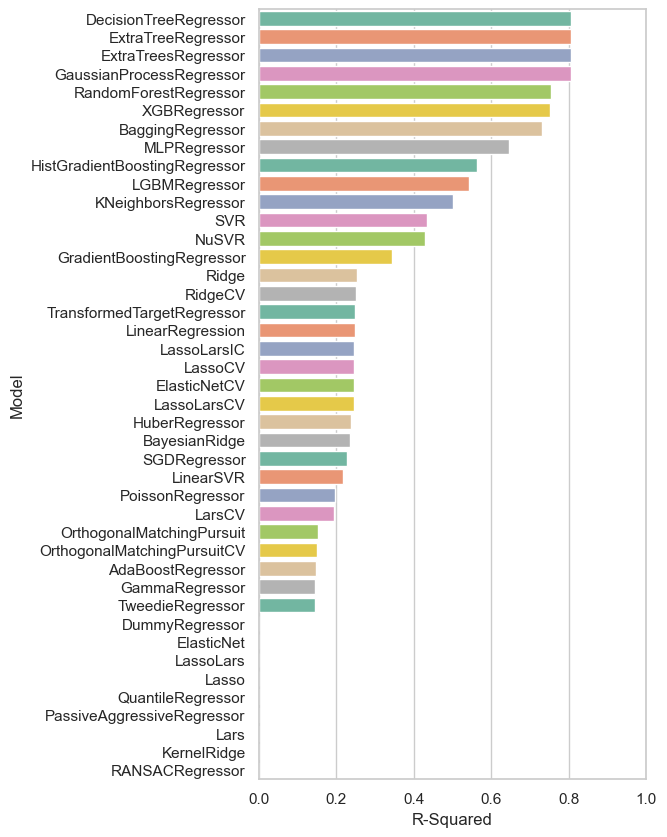

In [48]:
# Visualise the R-Squared
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train.index, x="R-Squared", data=prediction_train, palette='Set2')
ax.set(xlim=(0,1))

<Axes: xlabel='Time Taken', ylabel='Model'>

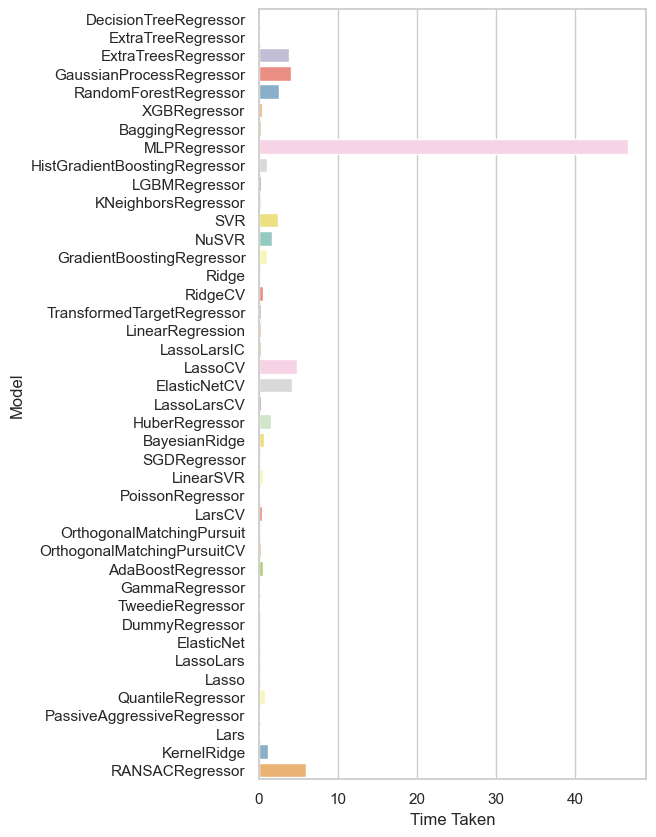

In [52]:
# Visulise the Calculation time: 
plt.figure(figsize=(5, 10))
sns.barplot(y=prediction_train.index, x="Time Taken", data=prediction_train, palette='Set3')